Processing windows (Extracting features): 100%|██████████| 6672/6672 [00:09<00:00, 688.14it/s]


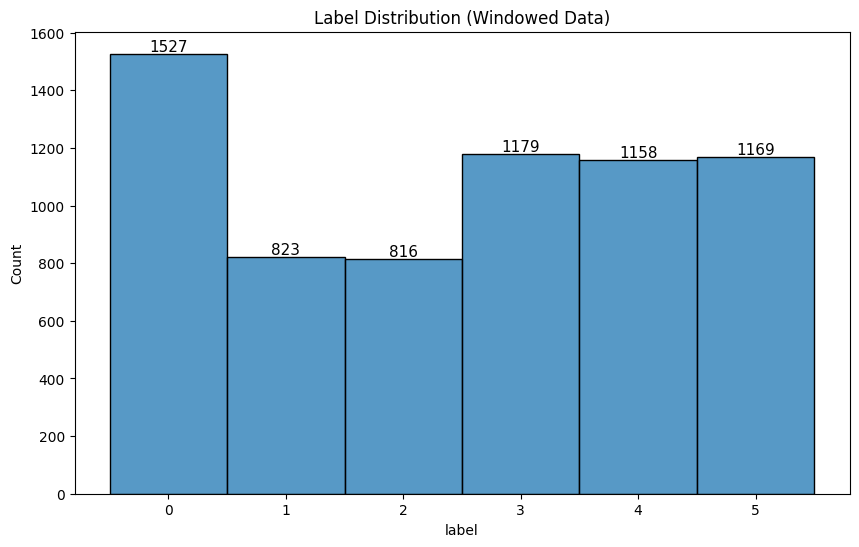

In [17]:
from BoxingRecognition.util import DataUtility

# Load data
df = DataUtility.get_feature_df(DataUtility.get_aggregate_df(drop_unlabeled_data=False, sessions=[1,2,3,4,5,6], augment_data=False, shuffle_sequences=False), window_size=50, overlap_size=25,drop_window_id=True)

In [18]:
from sklearn.model_selection import train_test_split

# Set the random state
rng = 404

# Get features and labels (x and y)
x = df.drop(columns='label')
y = df['label']

# Show how many times a unique label appears in the dataset
print(y.value_counts())

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rng)

label
0.0    1527
3.0    1179
5.0    1169
4.0    1158
1.0     823
2.0     816
Name: count, dtype: int64


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
model = DecisionTreeClassifier(random_state=rng,max_depth=5,min_samples_leaf=300)
model = model.fit(x_train, y_train)

In [20]:
from BoxingRecognition.util import EvaluationUtility

# Print the classification report
EvaluationUtility.print_model_classification_report(fitted_model=model, x_test=x_test, y_test=y_test)

              precision    recall  f1-score   support

         0.0       0.67      0.59      0.63       447
         1.0       0.60      0.74      0.66       250
         2.0       0.57      0.73      0.64       262
         3.0       0.75      0.73      0.74       340
         4.0       0.75      0.56      0.64       352
         5.0       0.92      0.98      0.95       351

    accuracy                           0.71      2002
   macro avg       0.71      0.72      0.71      2002
weighted avg       0.72      0.71      0.71      2002


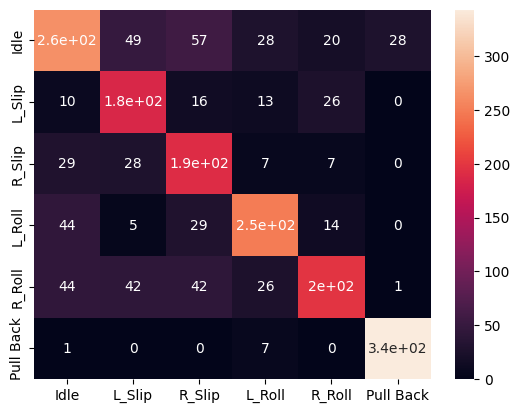

In [21]:
# Print the confusion matrix
EvaluationUtility.plot_confusion_matrix(fitted_model=model, x_test=x_test, y_test=y_test,labels=y.unique())

In [22]:
# Print the feature importances
feature_importances = model.feature_importances_
# Display the feature importances by sorting them in descending order, and printing the top 10
sorted_indices = feature_importances.argsort()[::-1]
for i in range(len(sorted_indices)):
    print(f'{x.columns[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]}')

accelerometer_x_var: 0.3300213837589529
gyroscope_y_rms: 0.28467188348092104
gyroscope_y_max: 0.2048137211261189
accelerometer_x_quantile_10: 0.11818693731374805
gyroscope_y_min: 0.03346059986299041
gyroscope_y_quantile_10: 0.013801221156947227
accelerometer_x_abs_max: 0.00867979301303367
accelerometer_x_std: 0.006364460287287765
gyroscope_y_abs_max: 0.0
gyroscope_y_var: 0.0
gyroscope_y_std: 0.0
accelerometer_x_rms: 0.0
accelerometer_x_max: 0.0
accelerometer_x_min: 0.0


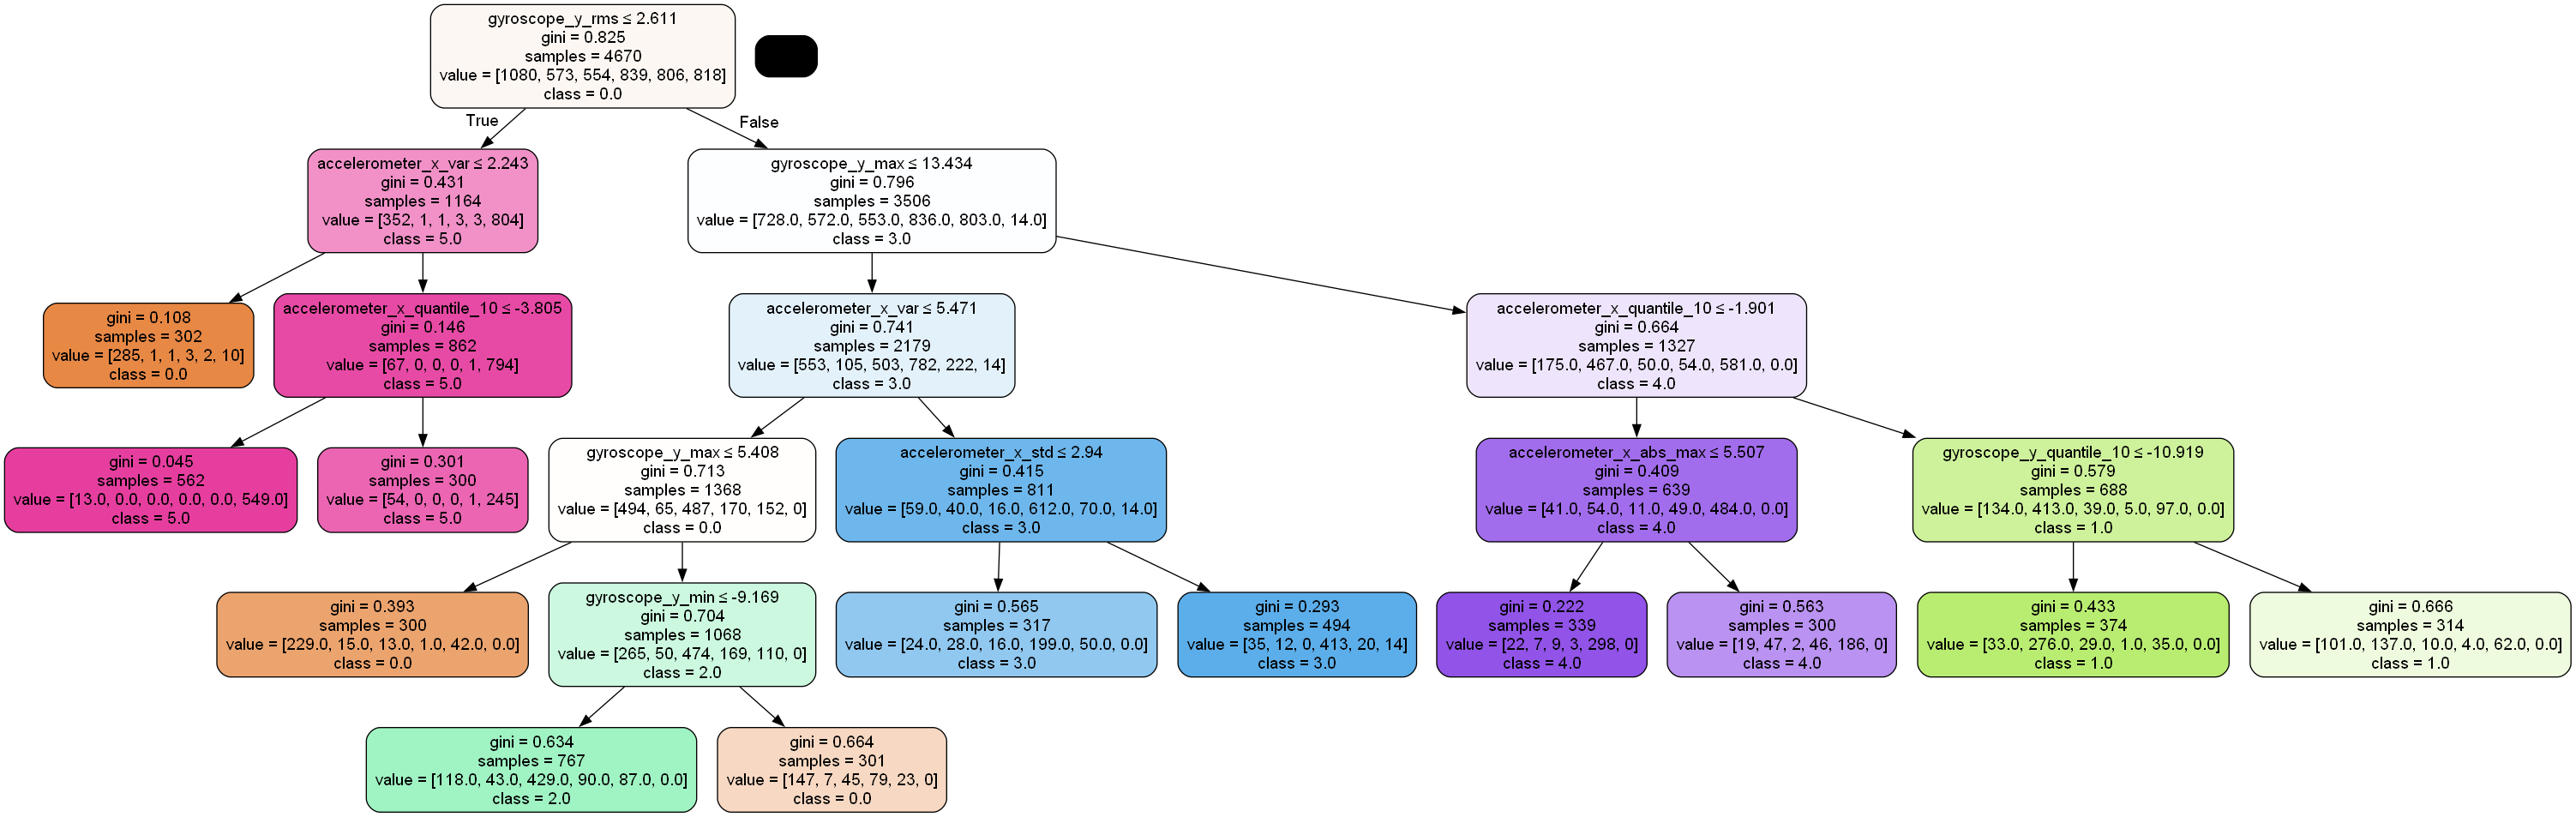

In [23]:
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz


class_names_str = [str(cls) for cls in y.unique()]

# Export the tree to dot format
dot_data = export_graphviz(model, out_file=None,
                           feature_names=x.columns,
                           class_names=class_names_str,
                           filled=True, rounded=True,
                           special_characters=True)

# Use pydotplus to create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Create an image
image = Image(graph.create_png())

# Display the image
display(image)

In [24]:
# Exporting the model
import joblib
joblib.dump((model, list(x.columns)), 'models/decision_tree_model_and_features.pkl')

['models/decision_tree_model_and_features.pkl']